___

TEXT MINING - DEEP LEARNING FOR NLP
___
# Text Generation with Neural Networks

## Functions for Processing Text

### Reading in files as a string text

In [1]:
def read_file(filepath):
    
    with open(filepath) as f:
        str_text = f.read()
    
    return str_text

In [2]:
read_file('moby_dick_four_chapters.txt')

'Call me Ishmael.  Some years ago--never mind how long\nprecisely--having little or no money in my purse, and nothing\nparticular to interest me on shore, I thought I would sail about a\nlittle and see the watery part of the world.  It is a way I have of\ndriving off the spleen and regulating the circulation.  Whenever I\nfind myself growing grim about the mouth; whenever it is a damp,\ndrizzly November in my soul; whenever I find myself involuntarily\npausing before coffin warehouses, and bringing up the rear of every\nfuneral I meet; and especially whenever my hypos get such an upper\nhand of me, that it requires a strong moral principle to prevent me\nfrom deliberately stepping into the street, and methodically knocking\npeople\'s hats off--then, I account it high time to get to sea as soon\nas I can.  This is my substitute for pistol and ball.  With a\nphilosophical flourish Cato throws himself upon his sword; I quietly\ntake to the ship.  There is nothing surprising in this.  If t

### Tokenize and Clean Text

In [3]:
import spacy
nlp = spacy.load('en_core_web_lg',disable=['parser', 'tagger','ner'])

nlp.max_length = 1198623

In [4]:
def separate_punc(doc_text):
    return [token.text.lower() for token in nlp(doc_text) if token.text not in '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n ']

In [5]:
d = read_file('melville-moby_dick.txt')
tokens = separate_punc(d)

C:\Users\abelli\AppData\Local\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [6]:
tokens

['chapter',
 '1',
 'loomings',
 'call',
 'me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse',
 'and',
 'nothing',
 'particular',
 'to',
 'interest',
 'me',
 'on',
 'shore',
 'i',
 'thought',
 'i',
 'would',
 'sail',
 'about',
 'a',
 'little',
 'and',
 'see',
 'the',
 'watery',
 'part',
 'of',
 'the',
 'world',
 'it',
 'is',
 'a',
 'way',
 'i',
 'have',
 'of',
 'driving',
 'off',
 'the',
 'spleen',
 'and',
 'regulating',
 'the',
 'circulation',
 'whenever',
 'i',
 'find',
 'myself',
 'growing',
 'grim',
 'about',
 'the',
 'mouth',
 'whenever',
 'it',
 'is',
 'a',
 'damp',
 'drizzly',
 'november',
 'in',
 'my',
 'soul',
 'whenever',
 'i',
 'find',
 'myself',
 'involuntarily',
 'pausing',
 'before',
 'coffin',
 'warehouses',
 'and',
 'bringing',
 'up',
 'the',
 'rear',
 'of',
 'every',
 'funeral',
 'i',
 'meet',
 'and',
 'especially',
 'whenever',
 'my',
 'hypos',
 'get',
 'such

In [7]:
len(tokens)

214708

In [8]:
214708/25

8588.32

## Create Sequences of Tokens

In [9]:
# organize into sequences of tokens
train_len = 25+1 # 25 training words , then one target word

# Empty list of sequences
text_sequences = []

for i in range(train_len, len(tokens)):
    
    # Grab train_len# amount of characters
    seq = tokens[i-train_len:i]
    
    # Add to list of sequences
    text_sequences.append(seq)

In [10]:
' '.join(text_sequences[0])

'chapter 1 loomings call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to'

In [11]:
' '.join(text_sequences[1])

'1 loomings call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest'

In [12]:
' '.join(text_sequences[2])

'loomings call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me'

In [13]:
len(text_sequences)

214682

# Keras

### Keras Tokenization

In [14]:
from keras.preprocessing.text import Tokenizer

In [15]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)

In [16]:
sequences[0]

[158,
 9443,
 17526,
 402,
 42,
 1043,
 43,
 247,
 659,
 140,
 296,
 116,
 82,
 787,
 347,
 113,
 36,
 50,
 1788,
 6,
 49,
 3028,
 3,
 218,
 442,
 5]

In [17]:
tokenizer.index_word

{1: 'the',
 2: 'of',
 3: 'and',
 4: 'a',
 5: 'to',
 6: 'in',
 7: 'that',
 8: 'his',
 9: 'it',
 10: 'i',
 11: 'he',
 12: 'but',
 13: "'s",
 14: 'as',
 15: 'with',
 16: 'is',
 17: 'was',
 18: 'for',
 19: 'all',
 20: 'this',
 21: 'at',
 22: 'not',
 23: 'by',
 24: 'whale',
 25: 'from',
 26: 'so',
 27: 'him',
 28: 'on',
 29: 'be',
 30: 'one',
 31: 'you',
 32: 'there',
 33: 'now',
 34: 'had',
 35: 'have',
 36: 'or',
 37: 'were',
 38: 'they',
 39: 'like',
 40: 'which',
 41: 'then',
 42: 'me',
 43: 'some',
 44: 'their',
 45: 'what',
 46: 'when',
 47: 'an',
 48: 'are',
 49: 'my',
 50: 'no',
 51: 'upon',
 52: 'out',
 53: 'man',
 54: 'into',
 55: 'ship',
 56: 'up',
 57: 'more',
 58: 'ahab',
 59: 'if',
 60: 'them',
 61: 'old',
 62: 'we',
 63: 'sea',
 64: 'would',
 65: "'",
 66: 'ye',
 67: 'do',
 68: 'other',
 69: 'been',
 70: 'over',
 71: 'these',
 72: 'will',
 73: 'though',
 74: 'only',
 75: 'its',
 76: 'down',
 77: 'such',
 78: 'who',
 79: 'yet',
 80: 'head',
 81: 'time',
 82: 'long',
 83: 'boat

In [18]:
for i in sequences[0]:
    print(f'{i} : {tokenizer.index_word[i]}')

158 : chapter
9443 : 1
17526 : loomings
402 : call
42 : me
1043 : ishmael
43 : some
247 : years
659 : ago
140 : never
296 : mind
116 : how
82 : long
787 : precisely
347 : having
113 : little
36 : or
50 : no
1788 : money
6 : in
49 : my
3028 : purse
3 : and
218 : nothing
442 : particular
5 : to


In [19]:
tokenizer.word_counts

OrderedDict([('chapter', 4447),
             ('1', 28),
             ('loomings', 3),
             ('call', 1382),
             ('me', 16095),
             ('ishmael', 500),
             ('some', 15789),
             ('years', 2400),
             ('ago', 815),
             ('never', 5262),
             ('mind', 2039),
             ('how', 6330),
             ('long', 8567),
             ('precisely', 690),
             ('having', 1679),
             ('little', 6412),
             ('or', 17879),
             ('no', 14916),
             ('money', 305),
             ('in', 105799),
             ('my', 15231),
             ('purse', 178),
             ('and', 164029),
             ('nothing', 2936),
             ('particular', 1273),
             ('to', 117832),
             ('interest', 442),
             ('on', 26910),
             ('shore', 572),
             ('i', 53430),
             ('thought', 3874),
             ('would', 11232),
             ('sail', 2522),
             ('about', 

In [20]:
vocabulary_size = len(tokenizer.word_counts)

### Convert to Numpy Matrix

In [21]:
import numpy as np

In [22]:
sequences = np.array(sequences)

In [23]:
sequences

array([[  158,  9443, 17526, ...,   218,   442,     5],
       [ 9443, 17526,   402, ...,   442,     5,  1165],
       [17526,   402,    42, ...,     5,  1165,    42],
       ...,
       [  240,   938,   351, ...,  1419,  1313,    74],
       [  938,   351,  1418, ...,  1313,    74,   219],
       [  351,  1418,     3, ...,    74,   219,   222]])

# Creating an LSTM based model

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding

In [37]:
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 100, input_length=seq_len))
    model.add(LSTM(150,return_sequences=True))
    model.add(LSTM(150)) 
    
    model.add(Dense(150, activation='relu'))
    model.add(Dense(vocabulary_size, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   
    model.summary()
    
    return model

### Train / Test Split

In [38]:
from tensorflow.keras.utils import to_categorical

In [39]:
sequences

array([[  158,  9443, 17526, ...,   218,   442,     5],
       [ 9443, 17526,   402, ...,   442,     5,  1165],
       [17526,   402,    42, ...,     5,  1165,    42],
       ...,
       [  240,   938,   351, ...,  1419,  1313,    74],
       [  938,   351,  1418, ...,  1313,    74,   219],
       [  351,  1418,     3, ...,    74,   219,   222]])

In [40]:
# First 25 words
sequences[:,:-1]

array([[  158,  9443, 17526, ...,     3,   218,   442],
       [ 9443, 17526,   402, ...,   218,   442,     5],
       [17526,   402,    42, ...,   442,     5,  1165],
       ...,
       [  240,   938,   351, ...,    84,  1419,  1313],
       [  938,   351,  1418, ...,  1419,  1313,    74],
       [  351,  1418,     3, ...,  1313,    74,   219]])

In [41]:
# last Word
sequences[:,-1]

array([   5, 1165,   42, ...,   74,  219,  222])

In [42]:
X = sequences[:,:-1]

In [43]:
y = sequences[:,-1]

In [44]:
y = to_categorical(y, num_classes=vocabulary_size+1)

In [45]:
seq_len = X.shape[1]

In [46]:
seq_len

25

### Training the Model

In [47]:
# define model
model = create_model(vocabulary_size+1, seq_len)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 100)           1752700   
                                                                 
 lstm_1 (LSTM)               (None, 25, 150)           150600    
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 150)               22650     
                                                                 
 dense_1 (Dense)             (None, 17527)             2646577   
                                                                 
Total params: 4753127 (18.13 MB)
Trainable params: 4753127 (18.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


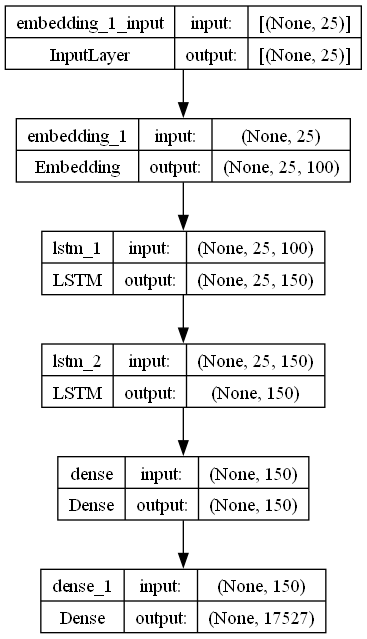

In [48]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [50]:
# fit model
model.fit(X, y, batch_size=128, epochs=50,verbose=2) #try with 300 epochs

Epoch 1/50
1678/1678 - 363s - loss: 6.0252 - accuracy: 0.1005 - 363s/epoch - 216ms/step
Epoch 2/50
1678/1678 - 387s - loss: 5.9096 - accuracy: 0.1054 - 387s/epoch - 231ms/step
Epoch 3/50
1678/1678 - 421s - loss: 5.7930 - accuracy: 0.1090 - 421s/epoch - 251ms/step
Epoch 4/50
1678/1678 - 399s - loss: 5.6868 - accuracy: 0.1121 - 399s/epoch - 237ms/step
Epoch 5/50
1678/1678 - 388s - loss: 5.5860 - accuracy: 0.1148 - 388s/epoch - 231ms/step
Epoch 6/50
1678/1678 - 302s - loss: 5.4821 - accuracy: 0.1177 - 302s/epoch - 180ms/step
Epoch 7/50
1678/1678 - 301s - loss: 5.3781 - accuracy: 0.1210 - 301s/epoch - 179ms/step
Epoch 8/50
1678/1678 - 306s - loss: 5.2666 - accuracy: 0.1235 - 306s/epoch - 182ms/step
Epoch 9/50
1678/1678 - 302s - loss: 5.1606 - accuracy: 0.1266 - 302s/epoch - 180ms/step
Epoch 10/50
1678/1678 - 303s - loss: 5.0558 - accuracy: 0.1302 - 303s/epoch - 181ms/step
Epoch 11/50
1678/1678 - 304s - loss: 4.9539 - accuracy: 0.1341 - 304s/epoch - 181ms/step
Epoch 12/50
1678/1678 - 304s -

In [51]:
import pickle
from pickle import dump,load

In [52]:
# save the model to file
model.save('./epochSmall.pkl')

# save the tokenizer
dump(tokenizer, open('./epochSmall-vocab', 'wb'))



INFO:tensorflow:Assets written to: ./epochSmall.pkl\assets


INFO:tensorflow:Assets written to: ./epochSmall.pkl\assets


# Generating New Text

In [53]:
from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

In [54]:
def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    '''
    INPUTS:
    model : model that was trained on text data
    tokenizer : tokenizer that was fit on text data
    seq_len : length of training sequence
    seed_text : raw string text to serve as the seed
    num_gen_words : number of words to be generated by model
    '''
    
    # Final Output
    output_text = []
    
    # Intial Seed Sequence
    input_text = seed_text
    
    # Create num_gen_words
    for i in range(num_gen_words):
        
        # Take the input text string and encode it to a sequence
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        
        # Pad sequences to our trained rate (50 words in the video)
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
        
        # Predict Class Probabilities for each word -- tensorflow 2.6
        #pred_word_ind = model.predict_classes(pad_encoded, verbose=0)[0]
        
        pred_word_ind_int = model.predict(pad_encoded, verbose=0)[0]
        
        pred_word_ind =np.argmax(pred_word_ind_int,axis=0) # break
        
        # Grab word
        pred_word = tokenizer.index_word[pred_word_ind] 
        
        # Update the sequence of input text (shifting one over with the new word)
        input_text += ' ' + pred_word
        
        output_text.append(pred_word)
        
    # Make it look like a sentence.
    return ' '.join(output_text)

### Grab a random seed sequence

In [55]:
text_sequences[0]

['chapter',
 '1',
 'loomings',
 'call',
 'me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse',
 'and',
 'nothing',
 'particular',
 'to']

In [56]:
import random
random.seed(101)
random_pick = random.randint(0,len(text_sequences))

In [57]:
random_seed_text = text_sequences[random_pick]

In [58]:
random_seed_text

['he',
 'recognised',
 'his',
 'cutting',
 'spade',
 'pole',
 'entangled',
 'in',
 'the',
 'lines',
 'that',
 'were',
 'knotted',
 'round',
 'the',
 'tail',
 'of',
 'one',
 'of',
 'these',
 'whales',
 'there',
 "'s",
 'a',
 'pretty',
 'fellow']

In [59]:
seed_text = ' '.join(random_seed_text)

In [60]:
seed_text

"he recognised his cutting spade pole entangled in the lines that were knotted round the tail of one of these whales there 's a pretty fellow"

In [61]:
generate_text(model,tokenizer,seq_len,seed_text=seed_text,num_gen_words=50)

'swore you have been lost in a shower of sight of the arsacidean enemy at the bottom of the sea the chicha quickly seldom in length put out of the whale systematically merged in the paddles and side the shadows of a naked monomania were become less than a male'